In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 8.0)

In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True);
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False);

In [0]:
def Learning(optimizer, mnist_net, X_test, y_test, X_train, y_train, batch_size):
    
    test_accuracy_history = []
    test_loss_history = []
    train_loss_history = []
    train_loss_mean_in_batch_history = []
    train_loss_in_batch = []
    k = 0

    for epoch in range(250):
        order = np.random.permutation(len(X_train))
        train_loss_in_batch = []
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            
            preds = mnist_net.forward(X_batch) 
            
            loss_value = loss(preds, y_batch)
            loss_value.backward()

            train_loss_in_batch.append(loss_value)
            
            optimizer.step()

        a = sum(train_loss_in_batch)/len(train_loss_in_batch)
        train_loss_mean_in_batch_history.append(a)
        test_preds = mnist_net.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test))
        train_loss_history.append(loss_value)
  
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
        test_accuracy_history.append(accuracy)

    return test_accuracy_history


In [0]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [0]:
X_train = X_train.float()
X_test = X_test.float()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

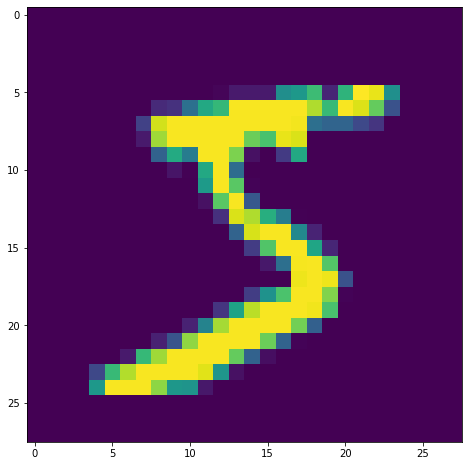

tensor(5)


In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :]);
plt.show();
print(y_train[0]);

In [0]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [0]:
torch.cuda.is_available()

True

In [0]:
!nvidia-smi

Sun Dec  8 22:21:55 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |  11249MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

list(mnist_net.parameters());

In [0]:
loss = torch.nn.CrossEntropyLoss()

In [0]:
batch_size = 8192

X_test = X_test.to(device)
y_test = y_test.to(device)



In [0]:
loss_history_adam = [] 
loss_history_SGD = [] 
loss_history_rmsprop = [] 
loss_history_rprop = [] 

for i in range(5):
    mnist_net = MNISTNet(100)
    mnist_net_SGD = MNISTNet(100)
    mnist_net_rmsprop = MNISTNet(100)
    mnist_net_rprop = MNISTNet(100)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    mnist_net = mnist_net.to(device)
    mnist_net_SGD = mnist_net_SGD.to(device)
    mnist_net_rmsprop = mnist_net_rmsprop.to(device)
    mnist_net_rprop = mnist_net_rprop.to(device)

    adam_optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
    sgd_optimizer = torch.optim.SGD(mnist_net_SGD.parameters(), lr=1.0e-2)
    rmsprop_optimizer = torch.optim.RMSprop(mnist_net_rmsprop.parameters(), lr=1.0e-3)
    rprop_optimizer = torch.optim.Rprop(mnist_net_rprop.parameters(), lr=1.0e-3)

    loss_history_adam.append(Learning(adam_optimizer, mnist_net, X_test, y_test, X_train, y_train, batch_size))
    loss_history_SGD.append(Learning(sgd_optimizer, mnist_net_SGD, X_test, y_test, X_train, y_train, batch_size))
    loss_history_rmsprop.append(Learning(rmsprop_optimizer, mnist_net_rmsprop, X_test, y_test, X_train, y_train, batch_size))
    loss_history_rprop.append(Learning(rprop_optimizer, mnist_net_rprop, X_test, y_test, X_train, y_train, batch_size))

loss_history = []
loss_history.append(list(map(lambda a: sum(a)/len(a), list(zip(loss_history_adam[0], loss_history_adam[1], loss_history_adam[2], loss_history_adam[3], loss_history_adam[4])))))
loss_history.append(list(map(lambda a: sum(a)/len(a), list(zip(loss_history_SGD[0], loss_history_SGD[1], loss_history_SGD[2], loss_history_SGD[3], loss_history_SGD[4])))))
loss_history.append(list(map(lambda a: sum(a)/len(a), list(zip(loss_history_rmsprop[0], loss_history_rmsprop[1], loss_history_rmsprop[2], loss_history_rmsprop[3], loss_history_rmsprop[4])))))
loss_history.append(list(map(lambda a: sum(a)/len(a), list(zip(loss_history_rprop[0], loss_history_rprop[1], loss_history_rprop[2], loss_history_rprop[3], loss_history_rprop[4])))))


In [0]:
"""plt.figure(facecolor="white", num="red")
# plt.plot(test_accuracy_history, label="Adam")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.grid(True, color='green')
plt.title("Зависимость loss на test и train", color='green')
plt.plot(test_loss_history, label="test", linewidth=3);
plt.plot(train_loss_history, label="train (last batch in current epoch)", linewidth=1);
plt.plot(train_loss_mean_in_batch_history, label="train (mean in each epoch)", linewidth=3);
plt.legend(loc='upper right');"""

'plt.figure(facecolor="white", num="red")\n# plt.plot(test_accuracy_history, label="Adam")\nplt.xlabel("number of epochs")\nplt.ylabel("loss")\nplt.grid(True, color=\'green\')\nplt.title("Зависимость loss на test и train", color=\'green\')\nplt.plot(test_loss_history, label="test", linewidth=3);\nplt.plot(train_loss_history, label="train (last batch in current epoch)", linewidth=1);\nplt.plot(train_loss_mean_in_batch_history, label="train (mean in each epoch)", linewidth=3);\nplt.legend(loc=\'upper right\');'

In [0]:
plt.figure(facecolor="white", num="red")
# plt.plot(test_accuracy_history, label="Adam")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.grid(True, color='green')
plt.title("Зависимость accuracy на train от разных спусков", color='green')
plt.plot(loss_history[0], label="Adam", linewidth=3);
plt.plot(loss_history[1], label="SGD", linewidth=5);
plt.plot(loss_history[2], label="RmsProp", linewidth=3);
plt.plot(loss_history[3], label="Rprop", linewidth=3);
plt.legend(loc='upper right');

NameError: ignored